In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

In [2]:
#Loading Data and Taking last 100 Candles
btc = pd.read_csv("BTC-USD.csv")
btc["Date"] = pd.to_datetime(btc["Date"])

btcsubset = btc.iloc[-100:]

btcsubset

btcsubset.to_csv("btcusdlast100.csv", index=False)

In [76]:
prevbtcbis = btc.iloc[-200: -100]
prevbtcbis.to_csv("prevbtcusdlast100.csv", index=False)
len(prevbtcbis)

100

/home/nomad/Desktop/PlsHireMe/PHMvenv/lib/python3.11/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


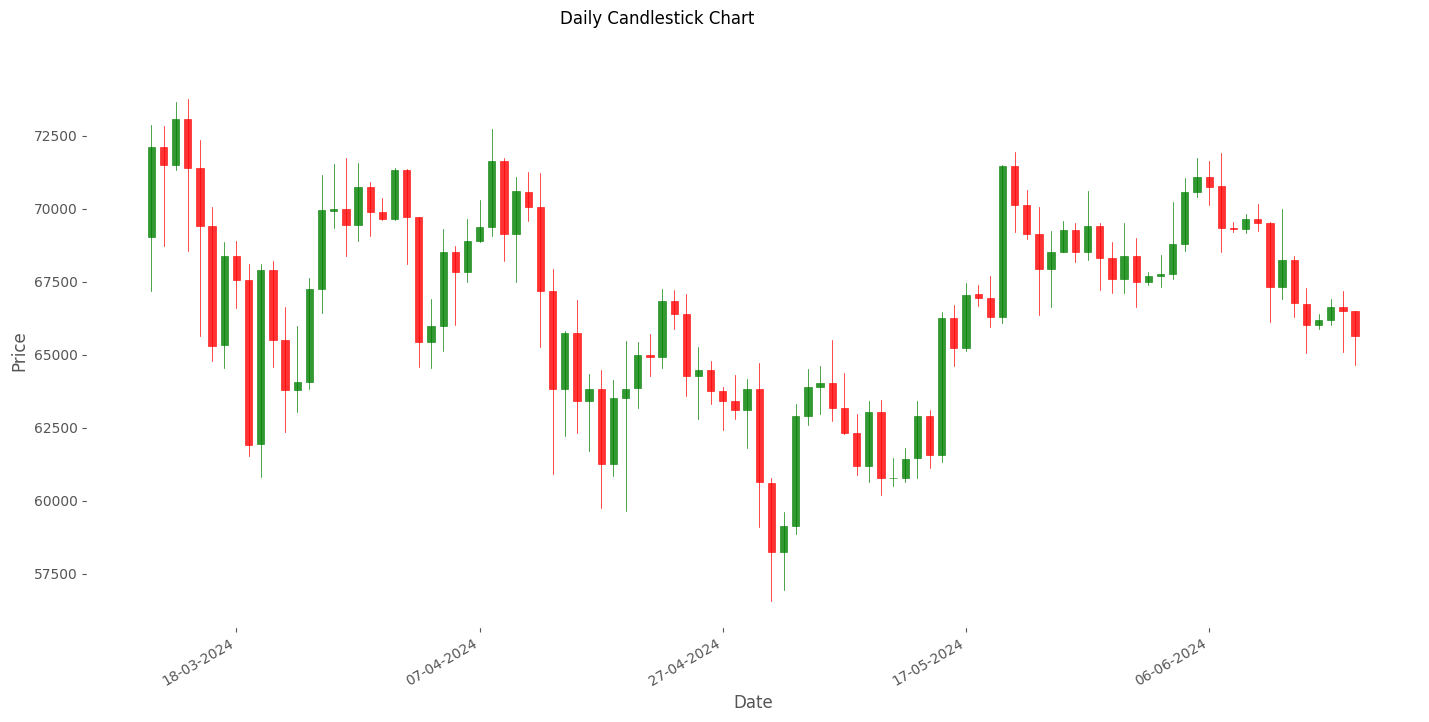

In [4]:
#Plotting last 100 Candles

btcbis = btcsubset.copy()

import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candles.png")

In [5]:
btcbisnp = btcbis.to_numpy() 
btcbisnp.shape

(100, 7)

In [6]:
#Calculating ZigZag
#CleaningUp ZigZag and Better Formula
#ZigZag Indicator on Closing Prices
zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcbisnp[0][0], btcbisnp[0][1]])

StartPoint = btcbisnp[0][1]

for x in range(1, len(btcbisnp)):
    ClosingPrice = btcbisnp[x][4]
    #prevClosingPrice = btcbisnp[x-1][4]
    
    pchange = ((ClosingPrice - StartPoint) / StartPoint) * 100
    
    if abs(pchange) >= threshold:
        if len(zigzag) >= 2:   
            if (pchange > 0 and (zigzag[-1][-1] - zigzag[-2][-1]) > 0) or (pchange < 0 and (zigzag[-1][-1] - zigzag[-2][-1]) < 0):
                zigzag.pop()
                
        zigzag.append([btcbisnp[x][0], btcbisnp[x][4]])
        StartPoint = ClosingPrice
    
#Appending Last and Deleting Previous Last one - Date and ClosingPrice
zigzag.pop()
zigzag.append([btcbisnp[-1][0], btcbisnp[-1][4]])

In [7]:
#Converting to DF
zzdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzdf.head()

,Date,ZZ
0,2024-03-11,69020.546875
1,2024-03-13,73083.500000
2,2024-03-16,65315.117188
3,2024-03-17,68390.625000
4,2024-03-19,61912.773438


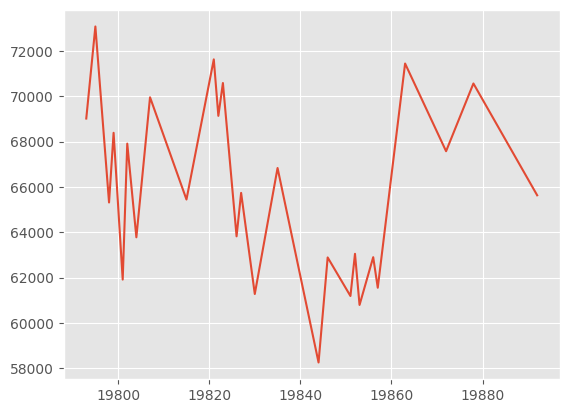

In [8]:
#Plotting ZigZag

newzzdf = zzdf.copy()

newzzdf['Date'] = pd.to_datetime(newzzdf['Date'])
newzzdf['Date'] = newzzdf['Date'].apply(mpl_dates.date2num)
newzzdf = newzzdf.astype(float)

plt.plot(newzzdf["Date"], newzzdf["ZZ"])

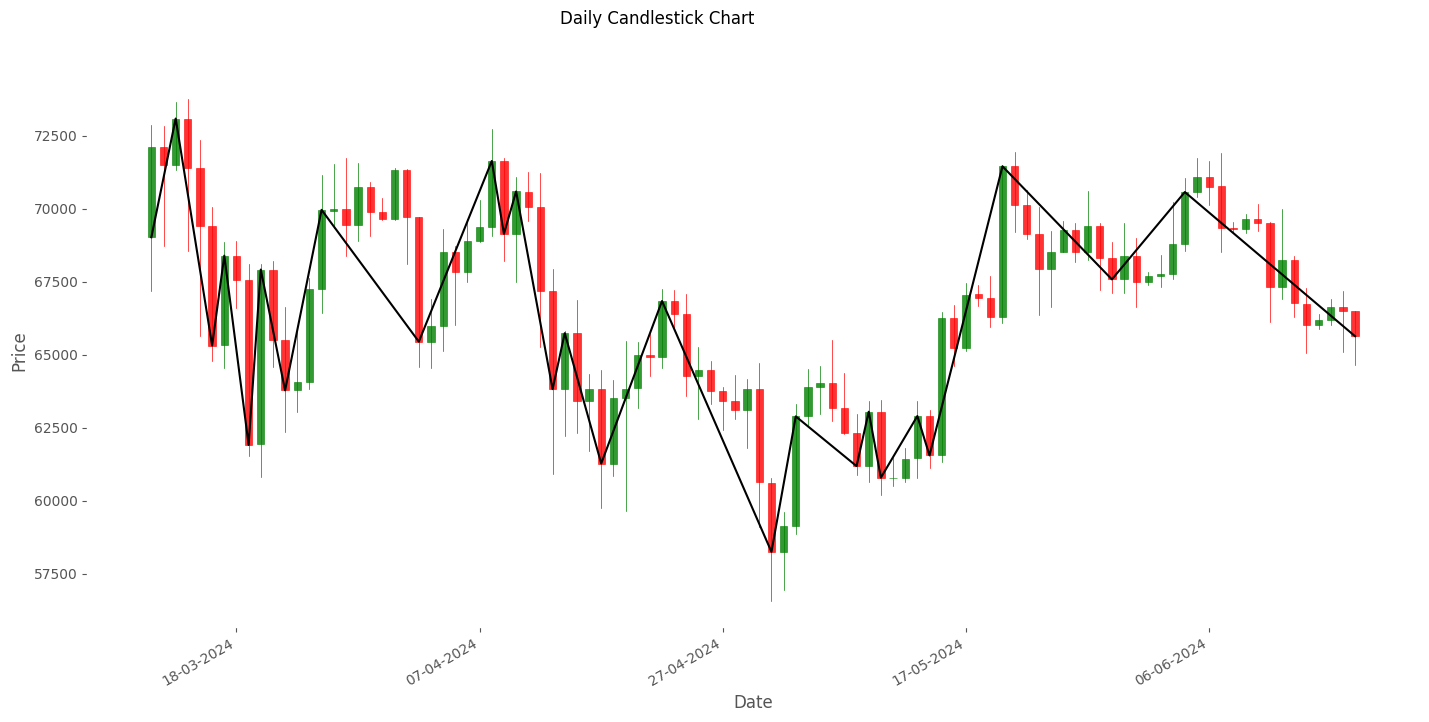

In [9]:
#Plotting ZigZag on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [10]:
#HL ZigZag
#Calculating ZigZag
#CleaningUp ZigZag and Better Formula
#ZigZag Indicator on Closing Prices
zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcbisnp[0][0], btcbisnp[0][1]])

StartPoint = zigzag[0][1]

for x in range(1, len(btcbisnp)):

    High = btcbisnp[x][2]
    Low = btcbisnp[x][3]

    pchangehigh = ((High - StartPoint) / StartPoint) * 100
    pchangelow = ((Low - StartPoint) / StartPoint) * 100

    #print(pchangehigh, pchangelow)

    best = 0

    if abs(pchangehigh) > abs(pchangelow):
        best = pchangehigh
        level = High
    
    else:
        best = pchangelow
        level = Low

    #print(best, level)

    if len(zigzag) >= 2:   
        if (zigzag[-1][-1] - zigzag[-2][-1]) > 0 and High > zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcbisnp[x][0], High])
            StartPoint = High
            continue
                
        elif (zigzag[-1][-1] - zigzag[-2][-1]) < 0 and Low < zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcbisnp[x][0], Low])
            StartPoint = Low
            continue
    
    if abs(best) >= threshold:
        zigzag.append([btcbisnp[x][0], level])
        StartPoint = level 

In [11]:
zzdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzdf.head()

,Date,ZZ
0,2024-03-11,69020.546875
1,2024-03-14,73750.070313
2,2024-03-17,64545.316406
3,2024-03-18,68897.132813
4,2024-03-20,60807.785156


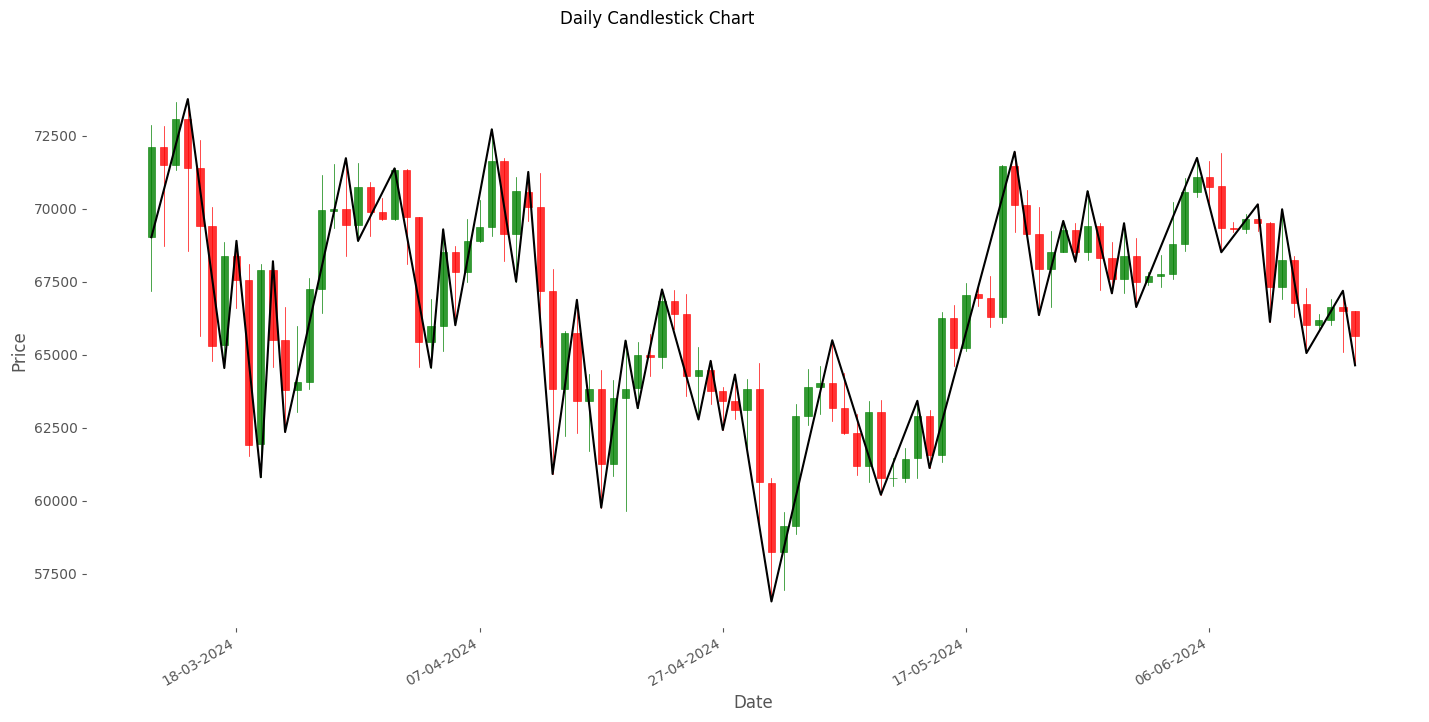

In [12]:
#Plotting ZigZag on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'])
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [13]:
#Calculating Pivot Points.

#Using Open as Previous day Close
Close = btcbis["Open"].iloc[0]
High = max(prevbtcbis["High"])
Low = min(prevbtcbis["Low"])

PP = round(((High + Low + Close) / 3), 2)

R1 = round(((2 * PP) - Low), 2)
S1 = round(((2 * PP) - High), 2)

R2 = round((PP + (High - Low)), 2)
S2 = round((PP - (High - Low)), 2)

R3 = round((High + (2 * (PP - Low))), 2)
S3 = round((Low - (2 *(High - PP))), 2)

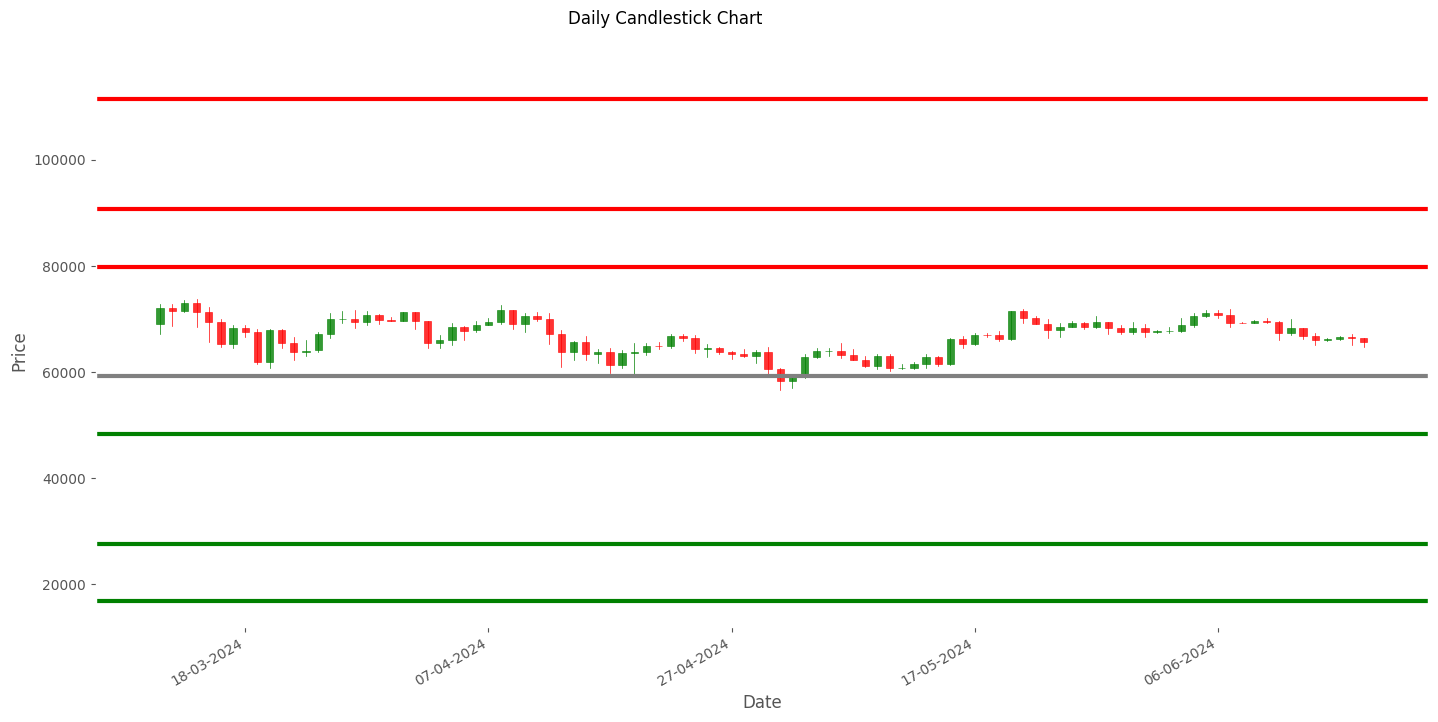

In [14]:
#Plotting Pivots on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

PivotColor = "Gray"
SuppColor = "Green"
ResColor = "Red"

plt.axhline(y = PP, color = PivotColor, lw = 3)

plt.axhline(y = R1, color = ResColor, lw = 3)
plt.axhline(y = S1, color = SuppColor, lw = 3)

plt.axhline(y = R2, color = ResColor, lw = 3)
plt.axhline(y = S2, color = SuppColor, lw = 3)

plt.axhline(y = R3, color = ResColor, lw = 3)
plt.axhline(y = S3, color = SuppColor, lw = 3)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [15]:
from sklearn.linear_model import LinearRegression as LR

HLR = LR()
LLR = LR()
CLR = LR()

X = np.array([x + 1 for x in range(len(btcbis))])
X = X. reshape(-1, 1)

HLR.fit(X, btcbis["High"])
LLR.fit(X, btcbis["Low"])
CLR.fit(X, btcbis["Close"])

HLRPred = HLR.predict(X)
LLRPred = LLR.predict(X)
CLRPred = CLR.predict(X)

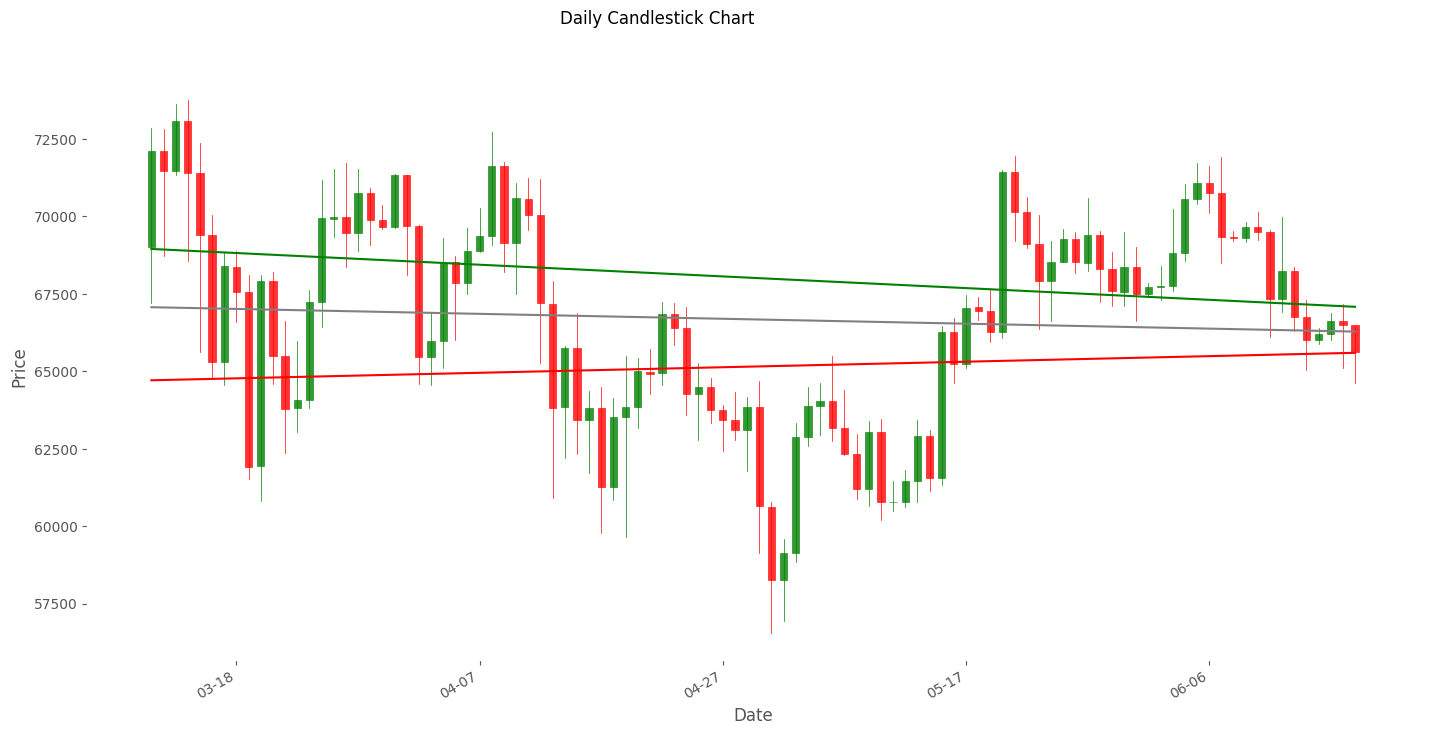

In [16]:
#Plotting Pivots on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

CloseReg = pd.DataFrame(btcbis['Date'].copy(), columns = ["Date"])
CloseReg["Reg"] = list(CLRPred)
CloseReg['Date'] = pd.to_datetime(CloseReg['Date'])
CloseReg['Date'] = CloseReg['Date'].apply(mpl_dates.date2num)
CloseReg = CloseReg.astype(float)

HighReg = pd.DataFrame(btcbis['Date'].copy(), columns = ["Date"])
HighReg["Reg"] = list(HLRPred)
HighReg['Date'] = pd.to_datetime(HighReg['Date'])
HighReg['Date'] = HighReg['Date'].apply(mpl_dates.date2num)
HighReg = HighReg.astype(float)

LowReg = pd.DataFrame(btcbis['Date'].copy(), columns = ["Date"])
LowReg["Reg"] = list(LLRPred)
LowReg['Date'] = pd.to_datetime(LowReg['Date'])
LowReg['Date'] = LowReg['Date'].apply(mpl_dates.date2num)
LowReg = LowReg.astype(float)

CloseColor = "Gray"
HighColor = "Green"
LowColor = "Red"

ax.plot(CloseReg["Date"], CloseReg["Reg"], color=CloseColor)
ax.plot(HighReg["Date"], HighReg["Reg"], color=HighColor)
ax.plot(LowReg["Date"], LowReg["Reg"], color=LowColor)

# Formatting Date
date_format = mpl_dates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

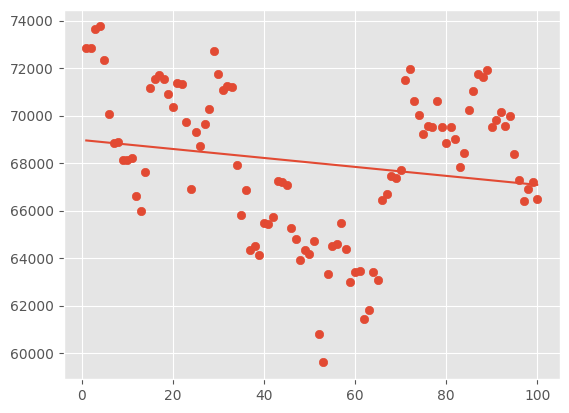

In [17]:
plt.scatter(X, btcbis["High"])
plt.plot(X, HLRPred)

In [18]:
listCLRPred = list(CLRPred)
CloseReg = pd.DataFrame(btcbis['Date'].copy())
CloseReg["Reg"] = list(CLRPred)
CloseReg.columns

Index(['Date', 'Reg'], dtype='object')

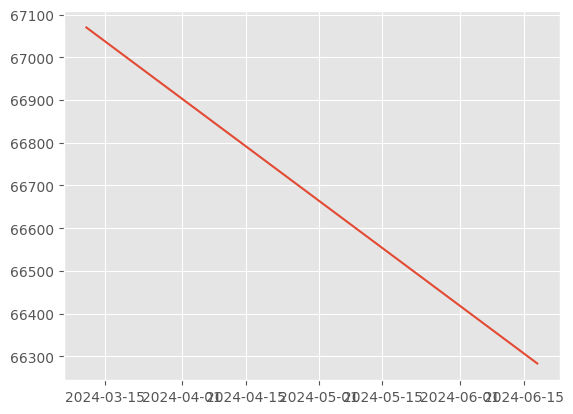

In [19]:
plt.plot(CloseReg["Date"], CloseReg["Reg"])

In [20]:
Volumes = btcsubset[["Date", "Volume"]].copy()
Volumes

,Date,Volume
267,2024-03-11,65716656765
268,2024-03-12,62554434520
269,2024-03-13,48212536929
270,2024-03-14,59594605698
271,2024-03-15,78320453976
...,...,...
362,2024-06-14,27403884779
363,2024-06-15,14121265576
364,2024-06-16,13281140541
365,2024-06-17,30006354476


In [31]:
mean = Volumes["Volume"].mean()

In [32]:
median = Volumes["Volume"].median()

In [33]:
std = Volumes["Volume"].std()

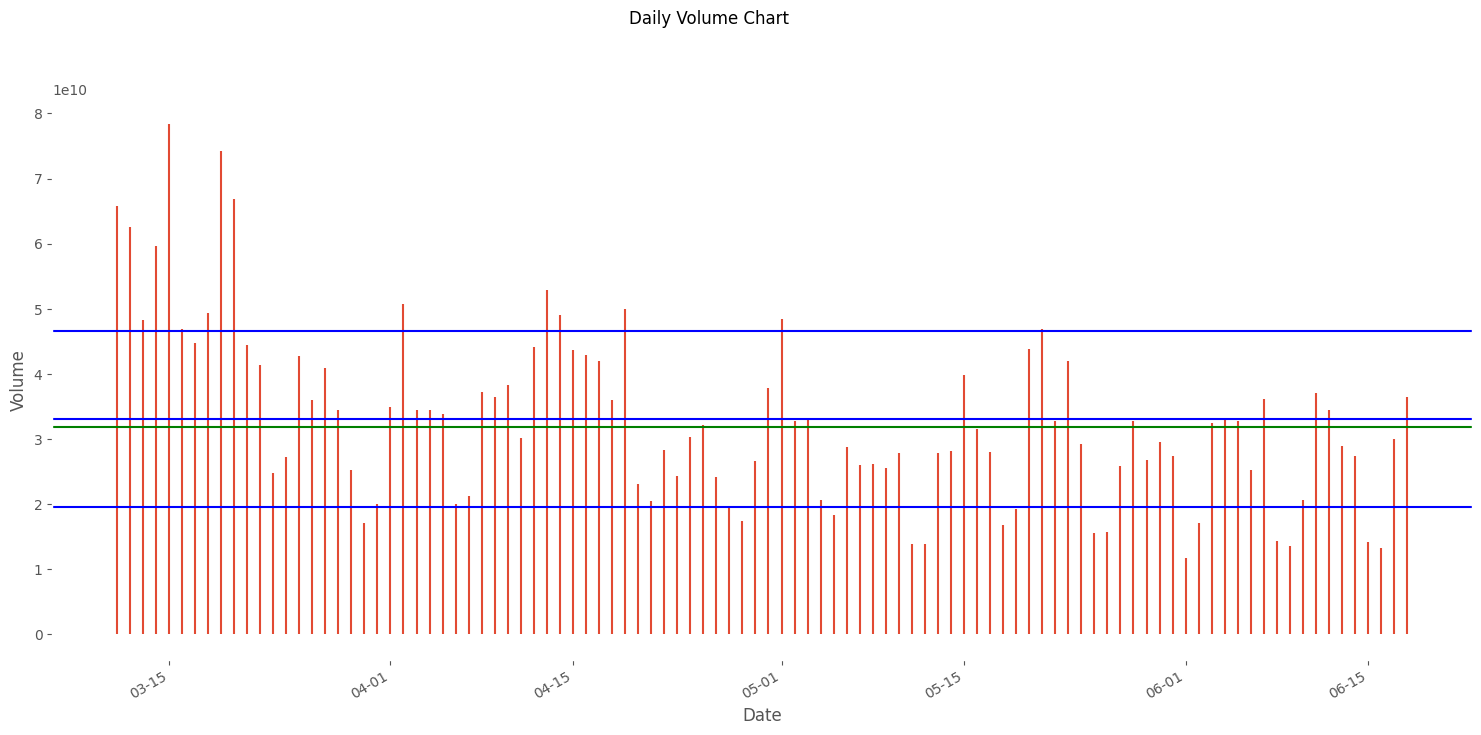

In [42]:
fig, ax = plt.subplots()

volsnp = Volumes.to_numpy()

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_facecolor('white')
fig.suptitle('Daily Volume Chart')

for x in volsnp:
    ax.vlines(x = x[0], ymin = 0, ymax = x[1])

ax.axhline(mean, color = "blue")
ax.axhline(mean + std, color = "blue")
ax.axhline(mean - std, color = "blue")
ax.axhline(median, color = "green")

# Formatting Date
date_format = mpl_dates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()


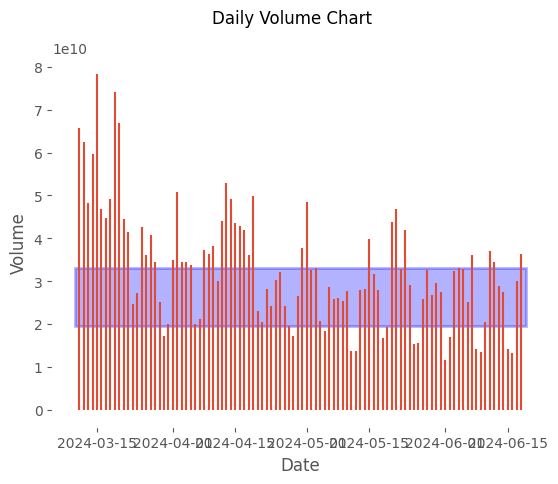

In [45]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_facecolor('white')
fig.suptitle('Daily Volume Chart')

for x in volsnp:
    ax.vlines(x = x[0], ymin = 0, ymax = x[1])

ax.add_patch(Rectangle((volsnp[0][0] - timedelta(days = 1), mean-std), timedelta(days = len(volsnp) +1), std,
             edgecolor = "blue",
             facecolor = "blue",
             fill = True,
             lw = 2,
             alpha = 0.3))

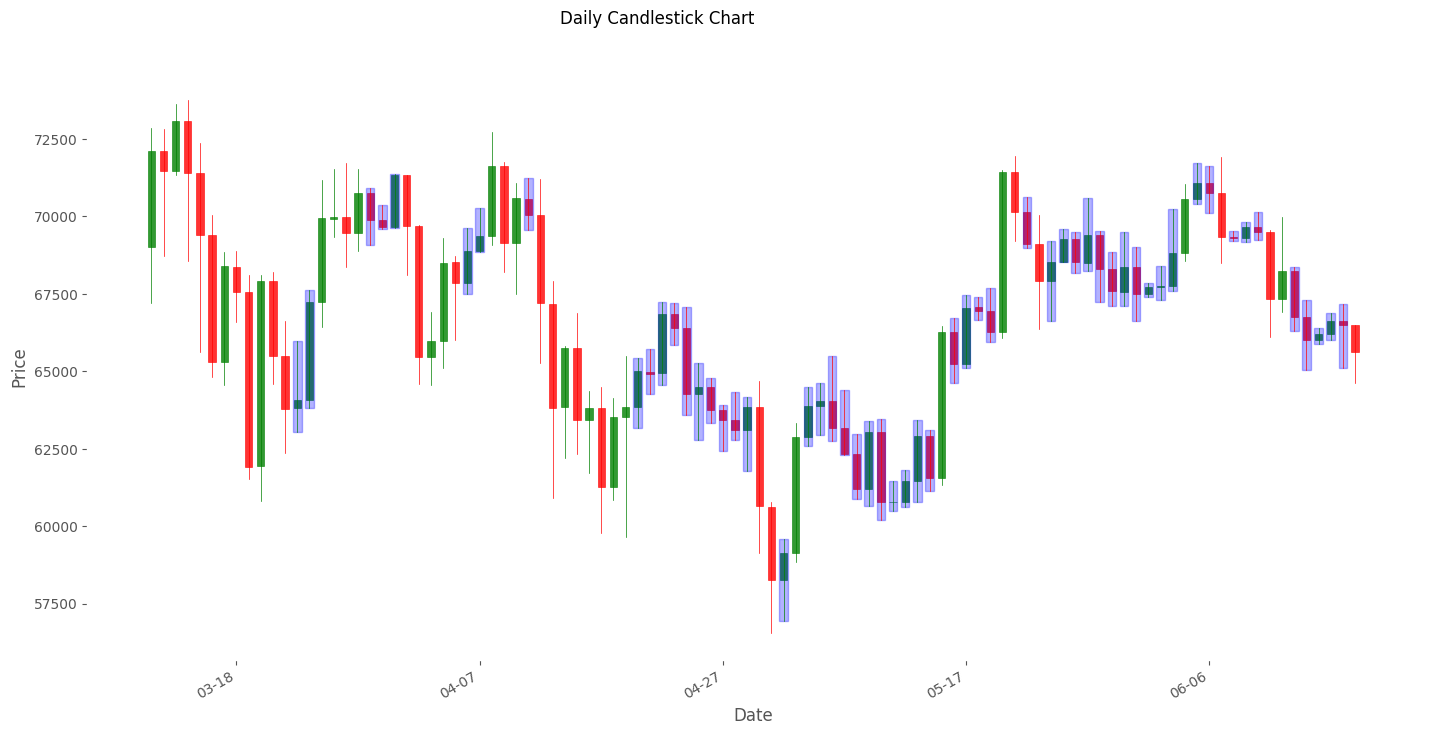

In [69]:
#Plotting Volume interval on top of Candle Chart

from matplotlib.patches import Rectangle

plt.style.use('ggplot')
fig, ax = plt.subplots()

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
ohlcnp = ohlc.to_numpy()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

volsnewnp = vols.to_numpy()

for x in ohlcnp:
    if x[-1] <= mean:
        #ax.vlines(x = x[0], ymin = 0, ymax = x[2])
        ax.add_patch(Rectangle((x[0] - 0.35, x[3]), 0.7, x[2] - x[3],
             edgecolor = "blue",
             facecolor = "blue",
             fill = True,
             lw = 1,
             alpha = 0.3))
        
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

In [71]:
TR = [[x[0], abs(x[2] - x[3])] for x in btcbisnp]
trdf = pd.DataFrame(TR, columns = ["Date", "TR"])

In [73]:
trmean = trdf["TR"].mean()
trmean

2862.695156290001

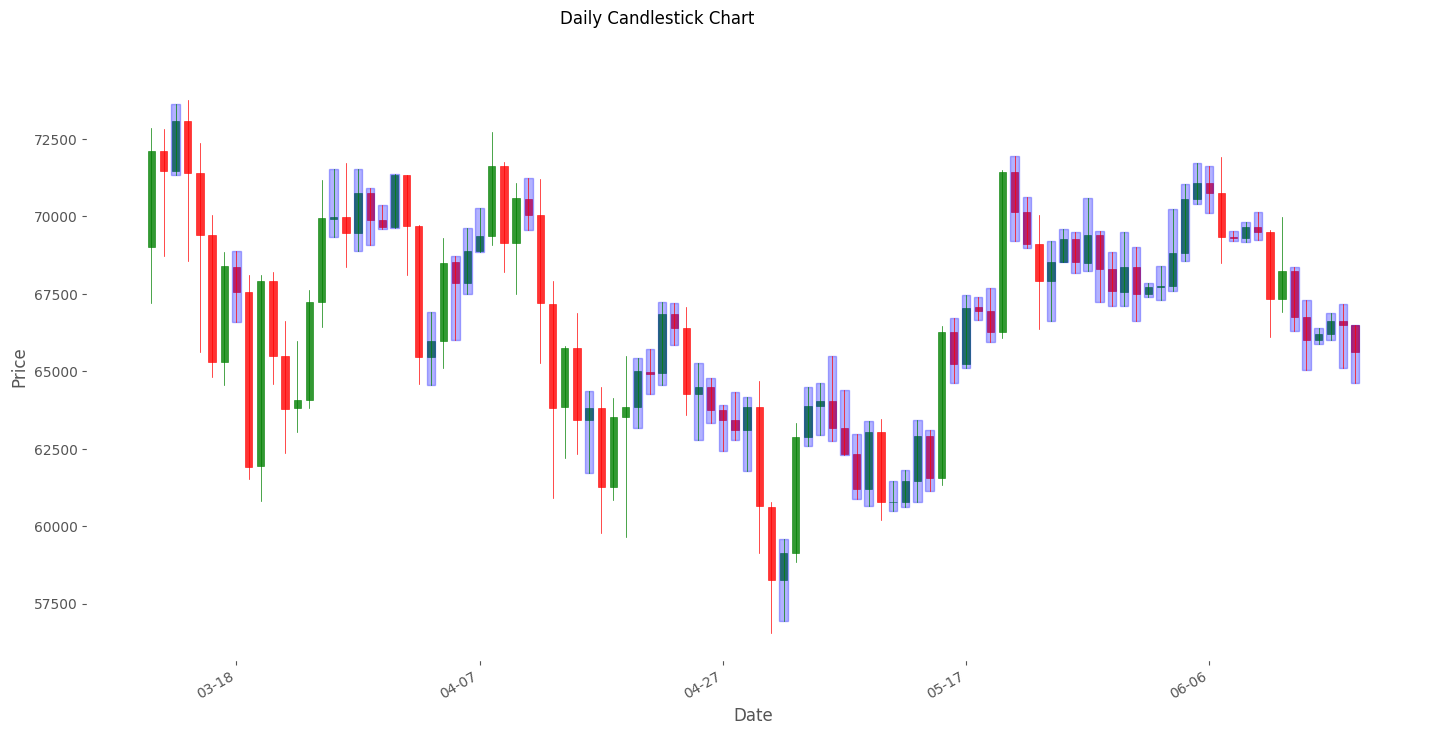

In [75]:
#Plotting Volume interval on top of Candle Chart

from matplotlib.patches import Rectangle

plt.style.use('ggplot')
fig, ax = plt.subplots()

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
ohlcnp = ohlc.to_numpy()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

for x in ohlcnp:
    if (x[2] - x[3]) <= trmean:
        ax.add_patch(Rectangle((x[0] - 0.35, x[3]), 0.7, x[2] - x[3],
             edgecolor = "blue",
             facecolor = "blue",
             fill = True,
             lw = 1,
             alpha = 0.3))
        
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()